In [1]:
#Setting
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# 원활한 채점을 위해 각 함수 안의 내용만 변경해주세요.
# padding()
# conv_calc()
# conv_fwd_layer()
# pool_fwd_layer()

In [16]:
# Q1 padding
def padding(X, pad_val):
    """
    들어온 입력 X를 pad_val만큼 각 축에 대해 0으로 padding

    Argument:
    X -- (m, n_H, n_W, n_C) shape의 numpy array, m:배치 사이즈, h:이미지 높이, w:이미지 넓이, c:이미지 채널
    pad_val -- integer 값, padding 크기

    Returns:
    padded_input -- padding된 이미지의 shape (m, n_H + 2*pad_val, n_W + 2*pad_val, n_C)
    """
    padded_X = np.pad(array=X, pad_width=((0,0),(pad_val,pad_val),(pad_val,pad_val),(0,0)), mode='constant', constant_values = 0)

    return padded_X

In [17]:
# 결과 비교를 위한 값
np.random.seed(1)
four_X = np.random.randn(4, 3, 3, 2)
print("four_X.shape", four_X.shape)
print("four_X.shape", "(4, 3, 3, 2)")
padded_four_X = padding(four_X, 2)
print("padded_four_X.shape", padded_four_X.shape)
print("padded_four_X.shape", "(4, 7, 7, 2)")
print ("four_X[1, 1] =", four_X[1, 1])
print("four_X[1, 1] =","[[ 0.90085595 -0.68372786] [-0.12289023 -0.93576943] [-0.26788808 0.53035547]]")
print ("padded_four_X[1, 1] =", padded_four_X[1, 1])
print("padded_four_X[1, 1] =","[[ 0. 0.] [ 0. 0.] [ 0. 0.] [ 0. 0.] [ 0. 0.] [ 0. 0.] [ 0. 0.]]")

four_X.shape (4, 3, 3, 2)
four_X.shape (4, 3, 3, 2)
padded_four_X.shape (4, 7, 7, 2)
padded_four_X.shape (4, 7, 7, 2)
four_X[1, 1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
four_X[1, 1] = [[ 0.90085595 -0.68372786] [-0.12289023 -0.93576943] [-0.26788808 0.53035547]]
padded_four_X[1, 1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
padded_four_X[1, 1] = [[ 0. 0.] [ 0. 0.] [ 0. 0.] [ 0. 0.] [ 0. 0.] [ 0. 0.] [ 0. 0.]]


In [ ]:
four_X[0]

In [ ]:
np.pad(array=four_X, pad_width=[(0,0),(2,2),(2,2),(0,0)], mode='constant', constant_values = 0)

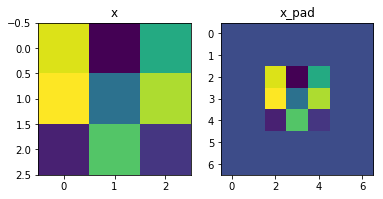

In [18]:
# 이전값과 출력값을 시각적으로 확인하기 위한 코드
% matplotlib inline
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(four_X[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(padded_four_X[0, :, :, 0])

In [19]:
def conv_calc(a_sliced_image, W, b):
    """
    W와 b로 정의된 필터를 입력 이미지의 한 부분에 적용

    Arguments:
    a_sliced_image -- 입력 이미지의 한 조각 (f, f, n_C_prev)
    W -- 현재 필터의 가중치 - matrix of shape (f, f, n_C_prev)
    b -- 현재 필터의 바이어스 - matrix of shape (1, 1, 1)

    Returns:
    Z -- 스칼라 값, Convolution한 결과
    """

    # a_sliced_image와 W에 대해 Element-wise product 연산 후 b를 더함
    tmp = np.multiply(a_sliced_image, W) + b
    # s의 모든 값을 덧셈
    V = np.sum(tmp)

    return V

In [20]:
# 결과 비교를 위한 값
np.random.seed(1)
a_sliced_image = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

conv_calc_result = conv_calc(a_sliced_image, W, b)
print("conv_calc_result =", conv_calc_result)
print("V = ","-23.1602122025")

conv_calc_result = -23.16021220252078
V =  -23.1602122025


In [21]:
hparameters = {"pad": 2,
               "stride": 1}

In [28]:
def conv_fwd_layer(X_prev, W, b, hparameters):
    (m, n_H_prev, n_W_prev, n_C_prev) = X_prev.shape

    (f, f, n_C_prev, n_C) = W.shape

    stride = hparameters['stride']
    pad = hparameters['pad']

    n_H = np.int(((n_H_prev - f+ 2*pad) / stride) + 1) 
    n_W = np.int(((n_W_prev - f+ 2*pad) / stride) + 1)

    Z = np.array(np.zeros((m, n_H, n_W, n_C)))
    #print('z: ', Z.shape)

    X_prev_pad = padding(X=X_prev, pad_val= pad)
    
    #print('X_prev_pad : ', X_prev_pad.shape)
    for i in range(m):  # 배치 사이즈만큼 loop
        a_prev_pad = X_prev_pad[i]  # padding이 된 입력들에서 i번째 입력을 가져옴
        #print(a_prev_pad)
        for h in range(n_H):  # 출력 레이어의 높이 만큼 loop
            for w in range(n_W):  # 출력 레이어의 넓이 만큼 loop
                for c in range(n_C):  # 출력 레이어의 체널 만큼 loop(= #filters)
                    # loop의 인덱스를 이용하여 출력 레이어에 들어갈 값 계산
                    vert_start = h
                    vert_end = h+ f
                    horiz_start = w
                    horiz_end = w + f
                    # i번째 padding된 입력에서 위에서 계산한 오프셋값들을 사용하여 필터 크기만큼의 조각을 가져옴
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    #print('slice ', a_slice_prev.shape)
                    # conv_calc()를 활용하여 가져온 조각(3D)에 대해 Convolution연산을 한 다음 출력 레이어의 해당 부분에 입력
                    Z[i, h, w, c] = conv_calc(a_slice_prev, W[..., c], b[..., c])

    assert (Z.shape == (m, n_H, n_W, n_C))

    return Z


In [29]:
# 결과 비교를 위한 값
np.random.seed(1)
X_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad": 2,
               "stride": 1}

conv_fwd_layer_result = conv_fwd_layer(X_prev, W, b, hparameters)
print("conv_fwd_layer_result의 평균 =", np.mean(conv_fwd_layer_result))
print("conv_fwd_layer_result의 평균 =", "0.155859324889")
print("X_prev.shape", X_prev.shape, "conv_fwd_layer_result.shape", "(10, 7, 7, 8)")
print("X_prev.shape", "(10, 4, 4, 3) ", "conv_fwd_layer_result.shape", conv_fwd_layer_result.shape)

conv_fwd_layer_result의 평균 = 0.15585932488906465
conv_fwd_layer_result의 평균 = 0.155859324889
X_prev.shape (10, 4, 4, 3) conv_fwd_layer_result.shape (10, 7, 7, 8)
X_prev.shape (10, 4, 4, 3)  conv_fwd_layer_result.shape (10, 7, 7, 8)


In [ ]:
def conv_fwd_layer(X_prev, W, b, hparameters):
    print('X_prev', X_prev.shape)
    print('W', W.shape)
    print('b', b.shape)
    """
    convolution function의 forward pass 동작을 구현

    입력 A_prev에 대해 Convolution filter W를 적용해보세요.
    각각의 필터 F(f,f)는 가중치 W와 bias b로 구성되어 있습니다.
    padding과 stride를 하기 위한 설정값은 hparameters에 들어있습니다.

    Arguments:
    X_prev -- 이전 레이어의 출력 값들, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- 현재 필터의 가중치들 - matrix of shape (f, f, n_C_prev, n_C)
    b -- 현재 필터의 바이어스들 - matrix of shape (1, 1, 1, n_C)
    hparameters -- stride 크기와 pad 크기를 가지고 있는 dictionary

    Returns:
    Z -- Convolution 결과값, numpy array of shape (m, n_H, n_W, n_C)
    """

    # 이전 레이어의 사이즈를 가져옴
    (m, n_H_prev, n_W_prev, n_C_prev) = X_prev.shape

    # W의 사이즈를 가져옴
    (f, f, n_C_prev, n_C) = W.shape

    # hparameters에서 'stride'와 'pad' 가져오기
    stride = hparameters['stride']
    pad = hparameters['pad']

    # 팁의 수식을 이용해서 출력 Conv레이어의 높이와 넓이 구하기, Hint: use int() to floor
    n_H = np.int(((n_H_prev - f + 2*pad) / stride) + 1)
    n_W = np.int(((n_W_prev - f + 2*pad) / stride) + 1)
    print('n_H', n_H, 'n_W',n_W)
    # 출력 Conv레이어를 0으로 초기화, Hint: use np.zeros()
    Z = np.zeros([m, n_H, n_W, n_C_prev])
    print(Z.shape)

    # 이전 레이어 출력 X_prev에 위에서 구현한 padding()을 사용하여 padding하기
    X_prev_pad = padding(pad_val=pad, X= X_prev)
    print('X_prev_pad',X_prev_pad.shape)
    for i in range(m):  # 배치 사이즈만큼 loop
        a_prev_pad = X_prev_pad[i]  # padding이 된 입력들에서 i번째 입력을 가져옴
        print('a_prev_pad',a_prev_pad.shape)
        for h in range(n_H):  # 출력 레이어의 높이 만큼 loop
            for w in range(n_W):  # 출력 레이어의 넓이 만큼 loop
                for c in range(n_C):  # 출력 레이어의 체널 만큼 loop(= #filters)
                    # loop의 인덱스를 이용하여 출력 레이어에 들어갈 값 계산
                    vert_start = h
                    print('vert_start',vert_start)
                    vert_end = h + f
                    print('vert_end',vert_end)
                    horiz_start = w
                    print('horiz_start',horiz_start)
                    horiz_end = w + f
                    print('horiz_end',horiz_end)
                    # i번째 padding된 입력에서 위에서 계산한 오프셋값들을 사용하여 필터 크기만큼의 조각을 가져옴
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    print(a_slice_prev.shape)
                    print(W.shape)
                    # conv_calc()를 활용하여 가져온 조각(3D)에 대해 Convolution연산을 한 다음 출력 레이어의 해당 부분에 입력
                    Z[i, h, w, c] = conv_calc(a_slice_prev, W[..., c], b[..., c])
                    # 계산된 Z에 대해 활성화 함수를 통과시키면 되나 이번 문제에서는 생략함
                    # A[i, h, w, c] = relu(Z[i, h, w, c])

    ### 아래 코드 부터는 변경할 필요 없음
    # 최종 출력 레이어의 크기와 초기화한 출력레이어의 크기를 비교
    assert (Z.shape == (m, n_H, n_W, n_C))

    return Z

In [ ]:
W = np.random.randn(2, 2, 3, 8)

In [ ]:
W[...,0].shape

In [ ]:
X_prev1 = np.random.randn(10, 4, 4, 5)

In [ ]:
padding(X_prev1, 2).shape

In [ ]:
# 결과 비교를 위한 값
np.random.seed(1)
X_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad": 2,
               "stride": 1}

conv_fwd_layer_result = conv_fwd_layer(X_prev, W, b, hparameters)
print("conv_fwd_layer_result의 평균 =", np.mean(conv_fwd_layer_result))
print("conv_fwd_layer_result의 평균 =", "0.155859324889")
print("X_prev.shape", X_prev.shape, "conv_fwd_layer_result.shape", "(10, 7, 7, 8)")
print("X_prev.shape", "(10, 4, 4, 3) ", "conv_fwd_layer_result.shape", conv_fwd_layer_result.shape)

In [32]:
def pool_fwd_layer(A_prev, hparameters, mode="max"):
    """
    Pooling layer의 forward pass 동작을 구현

    Arguments:
    A_prev -- 입력데이터, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- 필터 사이즈 f와 stride 크기를 가지고 있는 dictionary
    mode -- pooling mode ("max" or "average")

    Returns:
    A -- Pool layer의 출력, a numpy array of shape (m, n_H, n_W, n_C)
    """

    # 이전 레이어의 사이즈를 가져옴
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # hparameters에서 'f'와 'stride' 가져오기
    f = hparameters['f']
    #
    stride = hparameters['stride']

    # 출력 shape 정의
    n_H = np.int(((n_H_prev -f)/stride)+1)
    n_W = np.int(((n_W_prev - f)/stride)+1)
    n_C = n_C_prev

    # 출력 matrix A 초기화
    A = np.zeros([m, n_H, n_W, n_C])

    for i in range(m):  # 배치 사이즈만큼 loop
        for h in range(n_H):  # 출력 레이어의 높이 만큼 loop
            for w in range(n_W):  # 출력 레이어의 넓이 만큼 loop
                for c in range(n_C):  # 출력 레이어의 체널 만큼 loop(= #filters)

                    # loop의 인덱스를 이용하여 출력 레이어에 들어갈 값 계산
                    vert_start = h
                    vert_end = h+f
                    horiz_start = w
                    horiz_end = w+f

                    # 배치의 i번째 입력에서 위에서 계산한 오프셋값들을 사용하여 필터 크기만큼의 조각을 가져옴
                    a_prev_slice = A_prev[i, vert_start : vert_end, horiz_start : horiz_end, c]

                    # mode값에 따라 "max" 또는 "average" pooling연산 수행 Hint: Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.average(a_prev_slice)

    ### 아래 코드 부터는 변경할 필요 없음
    # 최종 출력 레이어의 크기와 초기화한 출력레이어의 크기를 비교
    assert (A.shape == (m, n_H, n_W, n_C))

    return A

In [33]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride": 1, "f": 4}

pool_fwd_layer_max_result = pool_fwd_layer(A_prev, hparameters)
print("mode = max")
print("pool_fwd_layer_max_result =", pool_fwd_layer_max_result)
print("pool_fwd_layer_max_result =", "[[[[ 1.74481176 1.6924546 2.10025514]]]\n[[[ 1.19891788 1.51981682 2.18557541]]]]")
print()
pool_fwd_layer_avg_result = pool_fwd_layer(A_prev, hparameters, mode="average")
print("mode = average")
print("pool_fwd_layer_avg_result =", pool_fwd_layer_avg_result)
print("pool_fwd_layer_avg_result =", "[[[[-0.09498456 0.11180064 -0.14263511]]]\n[[[-0.09525108 0.28325018 0.33035185]]]]")

mode = max
pool_fwd_layer_max_result = [[[[1.74481176 1.6924546  2.10025514]]]


 [[[1.19891788 1.51981682 2.18557541]]]]
pool_fwd_layer_max_result = [[[[ 1.74481176 1.6924546 2.10025514]]]
[[[ 1.19891788 1.51981682 2.18557541]]]]

mode = average
pool_fwd_layer_avg_result = [[[[-0.09498456  0.11180064 -0.14263511]]]


 [[[-0.09525108  0.28325018  0.33035185]]]]
pool_fwd_layer_avg_result = [[[[-0.09498456 0.11180064 -0.14263511]]]
[[[-0.09525108 0.28325018 0.33035185]]]]
